## Одномерная линейная регрессия

1. Выведите формулу обновления весов одномерной линейной регрессии методом градиентного спуска.

2. Напишите функцию, релизующую одномерной линейной регрессии методом градиентного спуска.

In [8]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
    N = float(len(y))
    for i in range(epochs):
        y_current = m_current * X + b_current
        cost = (1./N) * sum([err**2 for err in (y-y_current)])
        
        m_gradient = (-2./N)*sum(X*(y-y_current))
        b_gradient = (-2./N)*sum(y-y_current)
        
        m_current = m_current - learning_rate * m_gradient
        b_current = b_current - learning_rate * b_gradient        
        
    return m_current, b_current, cost

## Сгенерируем точки для задачи регрессии

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


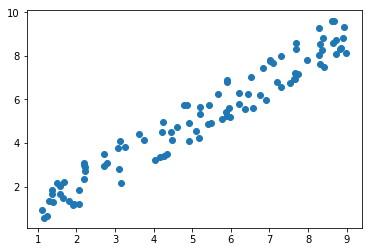

In [9]:
import random
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
%pylab inline

num_points = 100
m, b, delta = 1, 0, 1

x = np.array([random.uniform(1,9) for i in range(num_points)])
y = np.array([random.uniform(m*x+b-delta,m*x+b+delta) for x in x])

plt.scatter(x,y)

### Обучим нашу линейную регрессию и посмотрим на результат

In [10]:
m, b, cost = linear_regression(x,y)

MSE: 0.38145721606937244


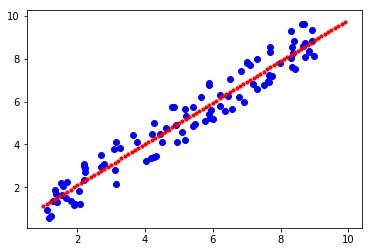

In [11]:
x_pr = np.arange(1,10,0.1)
y_pr = [m*elem+b for elem in x_pr] 

plt.scatter(x,y,color='blue')
plt.scatter(x_pr,y_pr,color='red',s=10)

print('MSE: {}'.format(cost))

# Задание 1

Поэкспериментируйте с количеством шагов (epochs) и learning rate.
Как меняется итоговая ошибка при фиксированном числе шагов и различных learning rate?

1) Постройте графики для learning rate = 0.1, 0.01, 0.0001 и epochs = 10, 100, 1000 (всего 9 графиков).
Рядом с каждым графиком выведите ошибку (cost).

2) Прокомментируйте каждый график: ответьте на вопрос, почему вы видите именно такую прямую?

epochs: 10, learning_rate: 0.1


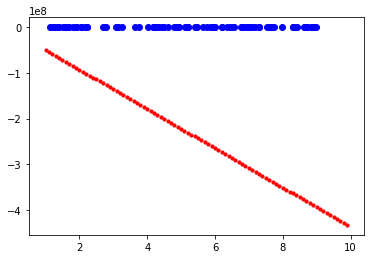

MSE: 1913182082846462.5
epochs: 10, learning_rate: 0.01


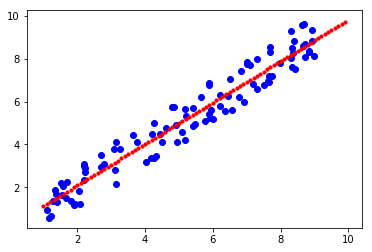

MSE: 0.38142180392987185
epochs: 10, learning_rate: 0.0001


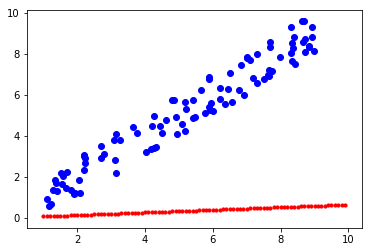

MSE: 29.305632462405708
epochs: 100, learning_rate: 0.1


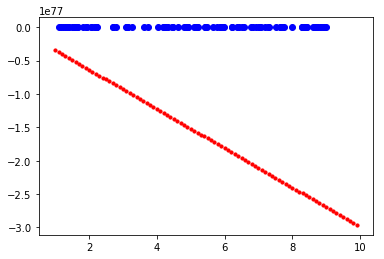

MSE: 8.950255541030942e+152
epochs: 100, learning_rate: 0.01


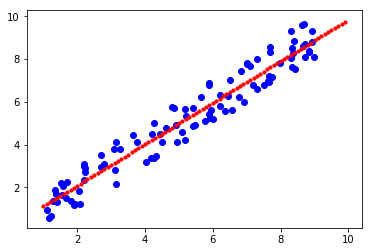

MSE: 0.3812600334269982
epochs: 100, learning_rate: 0.0001


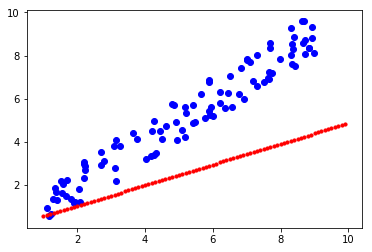

MSE: 8.822347601216945
epochs: 1000, learning_rate: 0.1


C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


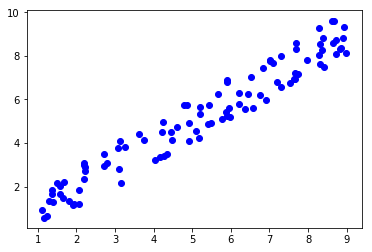

MSE: nan
epochs: 1000, learning_rate: 0.01


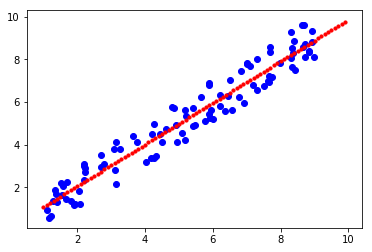

MSE: 0.38108334038587804
epochs: 1000, learning_rate: 0.0001


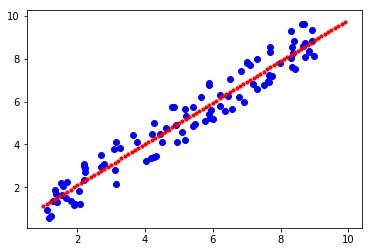

MSE: 0.38145721606937244


In [12]:
x_pr = np.arange(1,10,0.1)

for ep in [10,100,1000]:
    for lr in [0.1,0.01,0.0001]:
        print('epochs: {0}, learning_rate: {1}'.format(ep,lr))
        m, b, cost = linear_regression(x,y,epochs=ep,learning_rate=lr)
        y_pr = [m*elem+b for elem in x_pr] 

        plt.scatter(x,y,color='blue')
        plt.scatter(x_pr,y_pr,color='red',s=10)
        plt.show()
        
        print('MSE: {}'.format(cost))        

# Задание 2

Подумайте, как применить написанную функцию линейной регрессии для аппроксимации следующего набора точек. Решите эту задачу. Выведите на экран итоговое приближение (график) и ошибку.

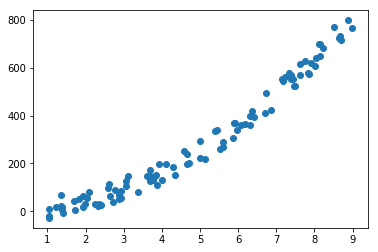

In [13]:
num_points = 100
m, b, delta = 10, 0, 50

x = np.array([random.uniform(1,9) for i in range(num_points)])
y = np.array([random.uniform(m*x*x+b-delta,m*x*x+b+delta) for x in x])

plt.scatter(x,y)

In [14]:
x

array([7.91828847, 2.58531436, 1.34292016, 5.52809424, 5.01027063,
       6.70104048, 5.86454094, 2.08717262, 5.60758467, 2.86610666,
       2.62275615, 2.36282537, 7.33833404, 2.25365421, 6.06640888,
       3.91489369, 3.85038685, 7.43200228, 6.72133119, 8.14462996,
       7.85151818, 8.51804294, 3.77818845, 7.37746669, 8.11365458,
       6.86071582, 1.22999   , 1.73366872, 8.69588406, 7.61141347,
       8.21718057, 3.05506305, 6.30954685, 1.93490376, 1.3939192 ,
       8.14149777, 5.60329902, 8.99501374, 1.40623057, 4.65692591,
       2.33418402, 3.6813506 , 1.39120674, 2.6526797 , 1.70911961,
       1.97923374, 8.05107957, 7.4750824 , 5.00383955, 4.64740315,
       2.3922306 , 6.31154896, 2.93442136, 7.50396185, 7.217128  ,
       5.13712759, 8.64609121, 4.70359242, 6.35820239, 2.72769516,
       5.90804658, 7.14944599, 4.09876439, 3.77634916, 2.0427026 ,
       1.35163821, 2.93058714, 1.04872708, 7.17391432, 1.03154016,
       3.60769744, 1.03972327, 1.92462227, 3.38789055, 2.87591

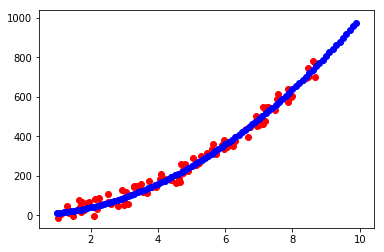

In [15]:
#your code here
x2 = np.array([el**2 for el in x])
y2 = y
m, b, cost = linear_regression(x2, y)

x = np.array([random.uniform(1,9) for i in range(num_points)])
y = np.array([random.uniform(m*x*x+b-delta,m*x*x+b+delta) for x in x])
plt.scatter(x,y,c='r')

# x_pr = np.arange(0,10,0.1)
# y_pr = [m * elem**2 + b for elem in x_pr]

x_pr2 = x_pr ** 2
y_pr = [m * elem + b for elem in x_pr2]


plt.scatter(x_pr,y_pr,c='b')

plt.show()

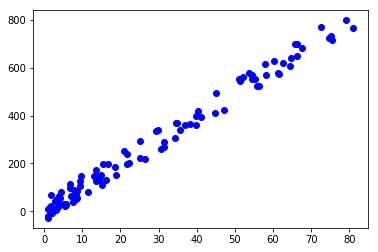

In [16]:
plt.scatter(x2,y2,c='b')

plt.show()

# Задание 3

Считайте файл weights_heights.csv

In [17]:
df = pd.read_csv("weights_heights.csv")
df.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


Разбейте данные на тренировочную и валидационную часть и обучите линейную регрессию на тренировочной части (используйте функцию linear_regression для обучения)

In [18]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(df['Height'],df['Weight'],test_size=0.2)

m,b,cost = linear_regression(Xtrain,ytrain,learning_rate=0.00001)

In [19]:
cost

106.71188368282913

Сделайте предсказание на тренировочной и тестовой части по формуле y=mx+b.

Вычислите MSE на train и на test.

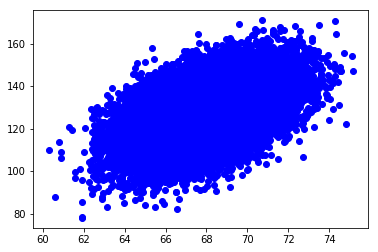

In [20]:
plt.scatter(df['Height'],df['Weight'],c='b')

plt.show()

In [21]:
from sklearn.metrics import mean_squared_error

prediction_train = m * Xtrain + b
prediction_test = m * Xtest + b

mean_squared_error(ytrain, prediction_train), mean_squared_error(ytest, prediction_test)

(106.7118835075791, 107.78721286201286)

# Теперь проверим, как работает функция линейной регрессии из sklearn

In [22]:
from sklearn.linear_model import LinearRegression

Xtrain2 = Xtrain.values.reshape(-1,1)
Xtest2 = Xtest.values.reshape(-1,1)

lr = LinearRegression()
lr.fit(Xtrain2,ytrain)

pred_train = lr.predict(Xtrain2)
pred_test = lr.predict(Xtest2)

print(mean_squared_error(pred_train,ytrain), mean_squared_error(pred_test,ytest))

101.11384972213281 103.53435582463169


Посмотрим на качество линейной регрессии на кросс-валидации.

In [23]:
ytrain.values.reshape(-1,1)

array([[135.8397],
       [126.5592],
       [132.9338],
       ...,
       [139.8376],
       [140.4031],
       [137.9111]])

In [24]:
from sklearn.model_selection import cross_val_score

print(-cross_val_score(lr, df[['Height']], df['Weight'], cv=3, 
                       scoring='neg_mean_squared_error').mean())

101.61260513801402


# Задание 4

Поработаем с датасетом Бостон.

In [25]:
from sklearn.datasets import load_boston

data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [26]:
data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [27]:
X_full = data.data
y_full = data.target

Посмотрите на качество линейной регрессии (из sklearn) на кросс-валидации.

In [28]:
type(data)

sklearn.utils.Bunch

In [29]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [30]:
data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [31]:
print(-cross_val_score(lr, X_full, y_full, cv=3, 
                       scoring='neg_mean_squared_error').mean())

169.00831238145855


Разбейте данные на train и test. Обучите линейную регрессию на train и сделайте предсказание на train и test.

Выведите MSE на train и на test.

In [32]:
print(-cross_val_score(lr, X_full, y_full, cv=3, 
                       scoring='r2').mean())

1.58419852209974


In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_full,y_full,test_size=0.2)

lr = LinearRegression()
lr.fit(Xtrain, ytrain)

pred_train = lr.predict(Xtrain)
pred_test = lr.predict(Xtest)

mean_squared_error(pred_train,ytrain), mean_squared_error(pred_test,ytest)


(22.68234389791599, 19.284359145885116)

Нарисуем матрицу корреляций признаков.

In [34]:
from sklearn.metrics import r2_score
Xtrain, Xtest, ytrain, ytest = train_test_split(X_full,y_full,test_size=0.2)

lr = LinearRegression()
lr.fit(Xtrain, ytrain)

pred_train = lr.predict(Xtrain)
pred_test = lr.predict(Xtest)

r2_score(pred_train,ytrain), r2_score(pred_test,ytest)

(0.6582190676713551, 0.6119811662008395)

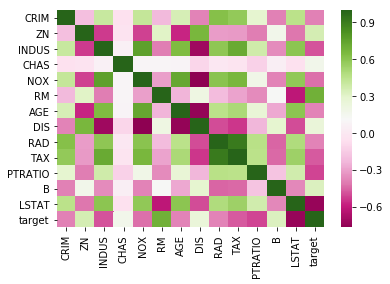

In [35]:
import seaborn as sns

data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= list(data['feature_names']) + ['target'])

corr = data1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="PiYG")

In [36]:
np.corrcoef(data1['LSTAT'],data1['target'])[0][1]

-0.7376627261740147

Попробуйте убрать из данных признаки с наименьшей корреляцией с target (1, 2 или 3 признака) и обучить линейную регрессию на оставшихся признаках. Как изменилось качество?


!!!!!!!!!!!!!!Качество ухудшилось

In [37]:
data1.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [38]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [39]:
#your code here
#Убираем CHAS и DIS
X_full_1 = data.data
y_full_1 = data.target
nm=data['feature_names']
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [40]:
type(nm)

numpy.ndarray

In [41]:
data['feature_names'][5]


'RM'

In [42]:
data['feature_names'].take([0,1,2,4,5,6,8,9,10,11,12])

array(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO',
       'B', 'LSTAT'], dtype='<U7')

In [43]:
X_full_2=X_full_1[:,[0,1,2,4,5,6,8,9,10,11,12]]
y_full_2=y_full_1

In [44]:
print(-cross_val_score(lr, X_full_2, y_full_2, cv=3, 
                       scoring='neg_mean_squared_error').mean())

109.64421061565918


In [45]:
print(-cross_val_score(lr, X_full_2, y_full_2, cv=3, 
                       scoring='r2').mean())

0.6697214391287089


In [46]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_full_2,y_full_2,test_size=0.2)

lr = LinearRegression()
lr.fit(Xtrain, ytrain)

pred_train = lr.predict(Xtrain)
pred_test = lr.predict(Xtest)

mean_squared_error(pred_train,ytrain), mean_squared_error(pred_test,ytest)

(24.71334775452907, 26.19155379724499)

In [47]:
from sklearn.metrics import r2_score
Xtrain, Xtest, ytrain, ytest = train_test_split(X_full_2,y_full_2,test_size=0.2)

lr = LinearRegression()
lr.fit(Xtrain, ytrain)

pred_train = lr.predict(Xtrain)
pred_test = lr.predict(Xtest)

r2_score(pred_train,ytrain), r2_score(pred_test,ytest)

(0.5302195407445431, 0.6752942335148706)

!!!!!!!!!!!!!!Качество ухудшилось

# Задание 1 (закончить дома)

Визуализируйте процесс обучения линейной регрессии, а именно:

любым способом сделайте анимацию процесса обучения, т.е. выводите регрессионную линию через 10, 20, 30 и т.д. шагов градиентного спуска. Если получится сделать анимацию - хорошо. Но можно просто вывести несколько графиков подряд.

In [48]:
#your code here

# Задание 2 (закончить дома)

Поработайте с датасетом affairs. Предскажите значение в колонке affairs по остальным факторам.

1. Сначала проведите разведочный анализ, а именно, исследуйте зависимость таргета от каждого фактора (или пары факторов).

2. Обучите линейную регрессию, посмотрите на качество на кросс-валидации, затем разбейте данные на train и test,
обучите алгоритм на train и сделайте предсказания на train и test, выведите ошибки.

3. Посмотрите на матрицу корреляций факторов и целевой переменной. 
Если есть пары сильно коррелирующих между собой факторов, удалите один из пары.

Если есть факторы, слабо коррелирующие с таргетом, удалите их.

Заново обучите алгоритм на обновленных данных. Как изменилось его качество?

In [49]:
#your code here
df1 = pd.read_csv("affairs.csv")

In [50]:
df1.head()



,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


Text(0.5, 1.0, 'occupation_husb')

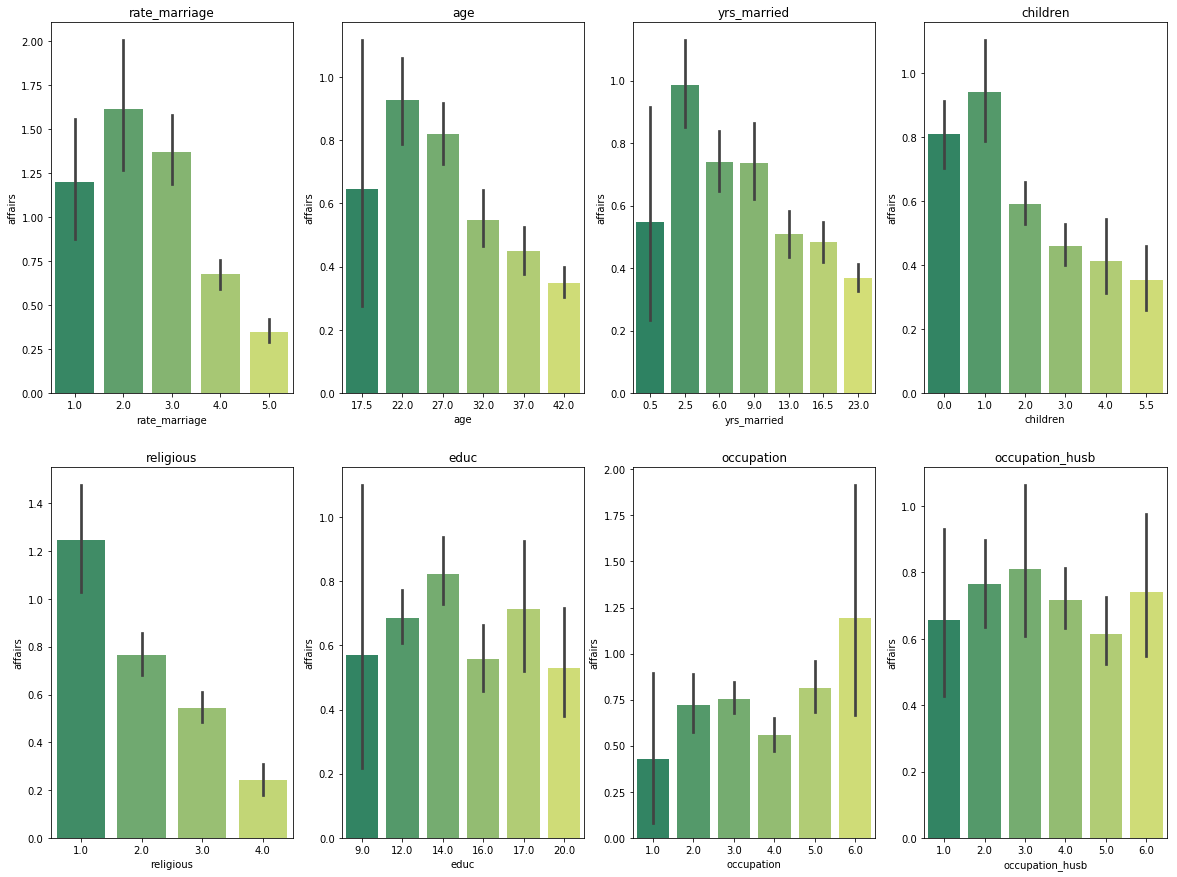

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#wage	exper	educ	looks
#sex	race	status	health
#plt.scatter(df['educ'], df['looks'], alpha=0.5)
#plt.show()
plt.figure(figsize=(20,15))
plt.subplot(2, 4, 1)
sns.barplot(x='rate_marriage',y='affairs',data=df1, palette='summer')
plt.title('rate_marriage')

plt.subplot(2, 4, 2)
sns.barplot(x='age',y='affairs',data=df1, palette='summer')
plt.title('age')

plt.subplot(2, 4, 3)
sns.barplot(x='yrs_married',y='affairs',data=df1, palette='summer')
plt.title('yrs_married')

plt.subplot(2, 4, 4)
sns.barplot(x='children',y='affairs',data=df1, palette='summer')
plt.title('children')

plt.subplot(2, 4, 5)
sns.barplot(x='religious',y='affairs',data=df1, palette='summer')
plt.title('religious')

plt.subplot(2, 4, 6)
sns.barplot(x='educ',y='affairs',data=df1, palette='summer')
plt.title('educ')

plt.subplot(2, 4, 7)
sns.barplot(x='occupation',y='affairs',data=df1, palette='summer')
plt.title('occupation')

plt.subplot(2, 4, 8)
sns.barplot(x='occupation_husb',y='affairs',data=df1, palette='summer')
plt.title('occupation_husb')

(-1, 2)

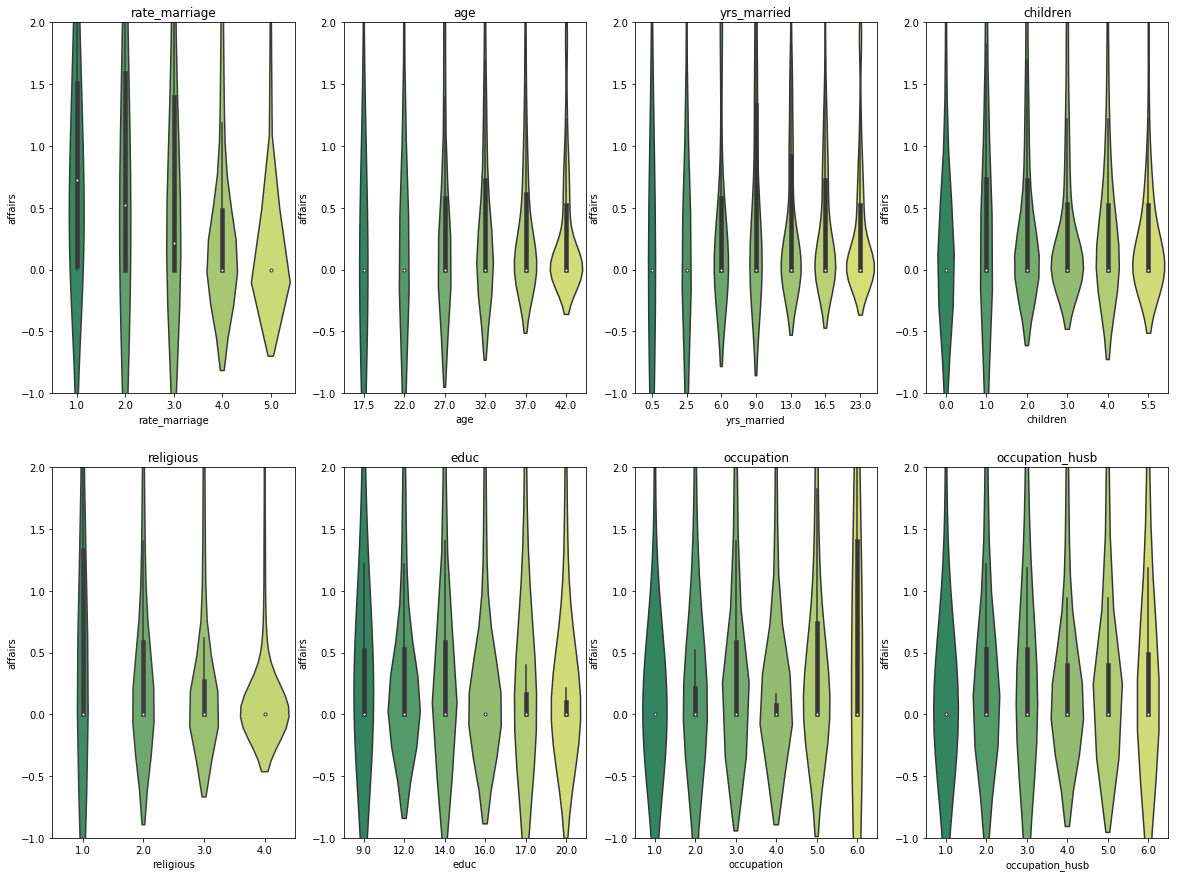

In [52]:
low_y = -1
high_y = 2
plt.figure(figsize=(20,15))
plt.subplot(2, 4, 1)
sns.violinplot(x='rate_marriage',y='affairs',data=df1, palette='summer')
plt.title('rate_marriage')
plt.ylim(low_y, high_y)

plt.subplot(2, 4, 2)
sns.violinplot(x='age',y='affairs',data=df1, palette='summer')
plt.title('age')
plt.ylim(low_y, high_y)

plt.subplot(2, 4, 3)
sns.violinplot(x='yrs_married',y='affairs',data=df1, palette='summer')
plt.title('yrs_married')
plt.ylim(low_y, high_y)

plt.subplot(2, 4, 4)
sns.violinplot(x='children',y='affairs',data=df1, palette='summer')
plt.title('children')
plt.ylim(low_y, high_y)

plt.subplot(2, 4, 5)
sns.violinplot(x='religious',y='affairs',data=df1, palette='summer')
plt.title('religious')
plt.ylim(low_y, high_y)

plt.subplot(2, 4, 6)
sns.violinplot(x='educ',y='affairs',data=df1, palette='summer')
plt.title('educ')
plt.ylim(low_y, high_y)

plt.subplot(2, 4, 7)
sns.violinplot(x='occupation',y='affairs',data=df1, palette='summer')
plt.title('occupation')
plt.ylim(low_y, high_y)

plt.subplot(2, 4, 8)
sns.violinplot(x='occupation_husb',y='affairs',data=df1, palette='summer')
plt.title('occupation_husb')
plt.ylim(low_y, high_y)

(-1, 4)

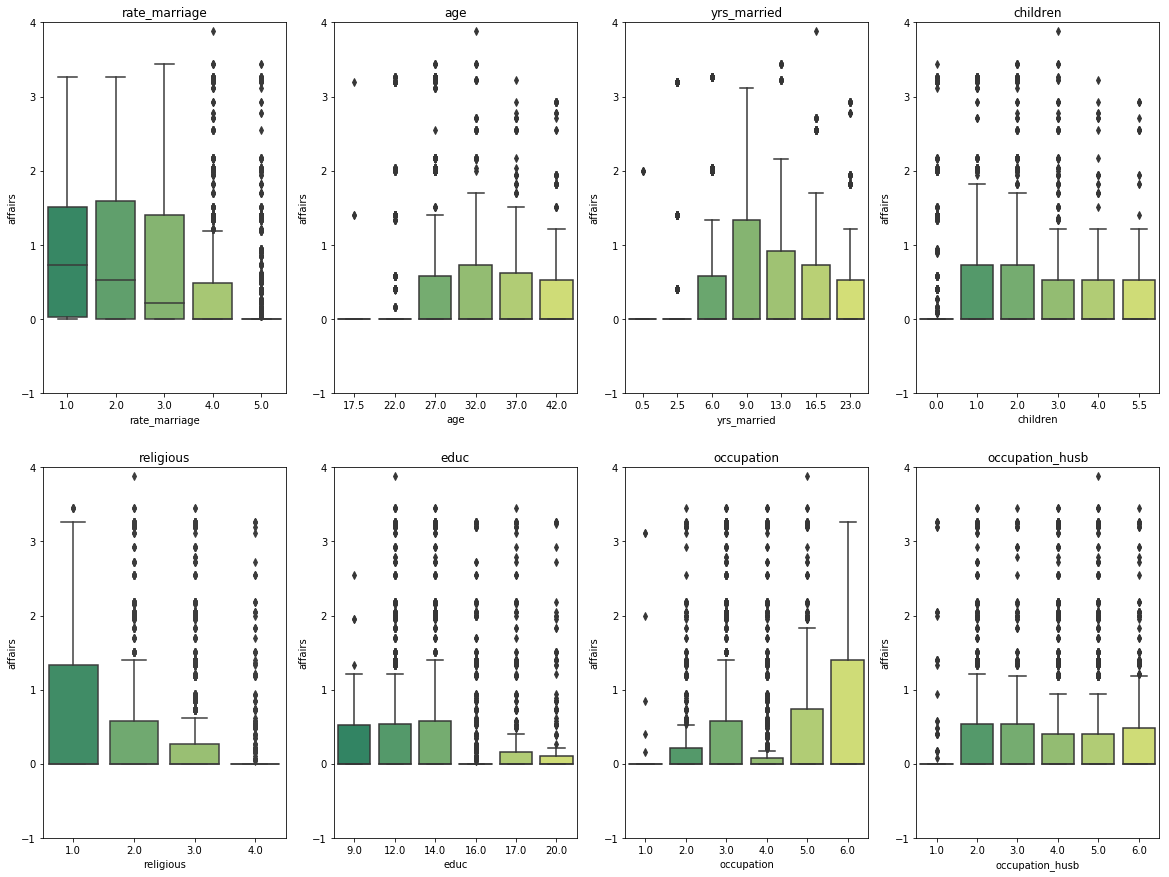

In [53]:
low_y = -1
high_y = 4

plt.figure(figsize=(20,15))
plt.subplot(2, 4, 1)
sns.boxplot(x='rate_marriage',y='affairs',data=df1, palette='summer')
plt.title('rate_marriage')
plt.ylim(low_y, high_y)

plt.subplot(2, 4, 2)
sns.boxplot(x='age',y='affairs',data=df1, palette='summer')
plt.title('age')
plt.ylim(low_y, high_y)

plt.subplot(2, 4, 3)
sns.boxplot(x='yrs_married',y='affairs',data=df1, palette='summer')
plt.title('yrs_married')
plt.ylim(low_y, high_y)

plt.subplot(2, 4, 4)
sns.boxplot(x='children',y='affairs',data=df1, palette='summer')
plt.title('children')
plt.ylim(low_y, high_y)

plt.subplot(2, 4, 5)
sns.boxplot(x='religious',y='affairs',data=df1, palette='summer')
plt.title('religious')
plt.ylim(low_y, high_y)

plt.subplot(2, 4, 6)
sns.boxplot(x='educ',y='affairs',data=df1, palette='summer')
plt.title('educ')
plt.ylim(low_y, high_y)

plt.subplot(2, 4, 7)
sns.boxplot(x='occupation',y='affairs',data=df1, palette='summer')
plt.title('occupation')
plt.ylim(low_y, high_y)

plt.subplot(2, 4, 8)
sns.boxplot(x='occupation_husb',y='affairs',data=df1, palette='summer')
plt.title('occupation_husb')
plt.ylim(low_y, high_y)

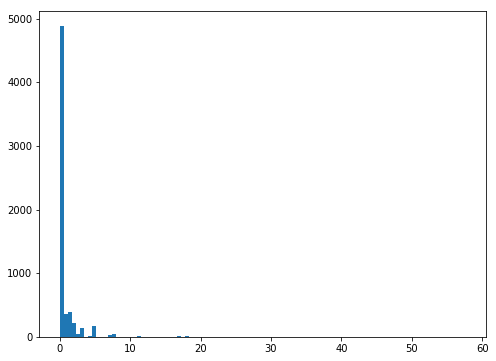

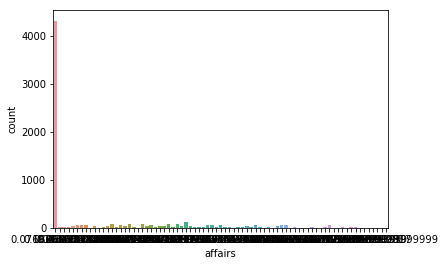

In [54]:
plt.figure(figsize=(8,6))
plt.hist(df1['affairs'], bins=100)
plt.show()
sns.countplot(x='affairs',data=df1)
plt.show()

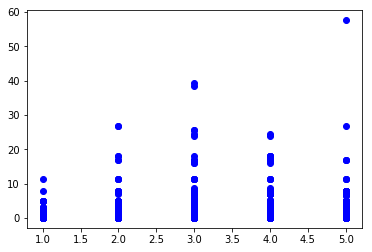

In [55]:
plt.scatter(df1['rate_marriage'],df1['affairs'],c='b')

(array([5.657e+03, 3.870e+02, 1.780e+02, 3.900e+01, 5.300e+01, 1.700e+01,
        0.000e+00, 0.000e+00, 1.500e+01, 8.000e+00, 0.000e+00, 0.000e+00,
        4.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.        ,  1.91999969,  3.83999939,  5.75999908,  7.67999877,
         9.59999847, 11.51999816, 13.43999785, 15.35999755, 17.27999724,
        19.19999693, 21.11999663, 23.03999632, 24.95999601, 26.87999571,
        28.7999954 , 30.71999509, 32.63999479, 34.55999448, 36.47999417,
        38.39999387, 40.31999356, 42.23999325, 44.15999295, 46.07999264,
        47.99999233, 49.91999203, 51.83999172, 53.75999141, 55.67999111,
        57.5999908 ]),
 <a list of 30 Patch objects>)

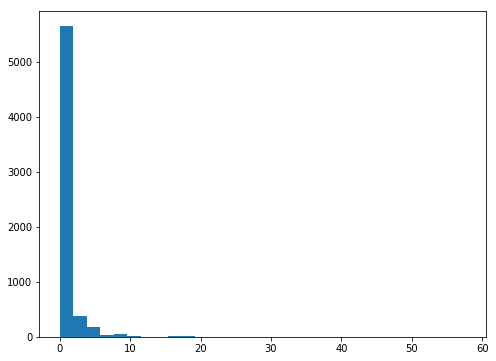

In [56]:
plt.figure(figsize=(8,6))
plt.hist(df1['affairs'], bins=30)

In [57]:
X_full1=df1[['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'occupation', 'occupation_husb']] 
y_full1=df1['affairs']

In [58]:
from sklearn.model_selection import train_test_split
# rate_marriage	age	yrs_married	children	religious	educ	occupation	occupation_husb	affairs
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X_full1, y_full1 ,test_size=0.2)


In [59]:
print(-cross_val_score(lr, X_full1, y_full1, cv=3, 
                       scoring='neg_mean_squared_error').mean())

6.217437939414919


In [60]:
print(-cross_val_score(lr, X_full1, y_full1, cv=8, 
                       scoring='neg_mean_squared_error'))

[15.06480078 12.62360717  7.60613063  0.82554889  0.73290788  0.80665831
  0.7783426   0.75123576]


In [61]:
print(-cross_val_score(lr, X_full1, y_full1, cv=8, 
                       scoring='r2').mean())

0.03817709277599268


In [62]:
print(-cross_val_score(lr, X_full1, y_full1, cv=20, 
                       scoring='r2'))

[ 0.16175728  0.11547764  0.09052978  0.16635931  0.10786719  0.12650694
 -0.07565837 -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.        ]


In [63]:
df1['affairs'].head()

0    0.111111
1    3.230769
2    1.400000
3    0.727273
4    4.666666
Name: affairs, dtype: float64

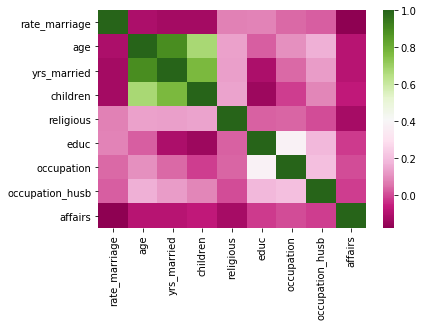

In [65]:
import seaborn as sns

corr1 = df1.corr()
sns.heatmap(corr1, 
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values,
            cmap="PiYG")

In [69]:
X_full2=df1[['rate_marriage', 'yrs_married', 'religious', 'educ', 'occupation', 'occupation_husb']] 
y_full2=df1['affairs']

In [78]:
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X_full2, y_full2 ,test_size=0.2)

In [79]:
lr = LinearRegression()

In [80]:
print(-cross_val_score(lr, X_full2, y_full2, cv=3, 
                       scoring='neg_mean_squared_error').mean())

6.214539181374704


In [81]:
print(-cross_val_score(lr, X_full2, y_full2, cv=8, 
                       scoring='neg_mean_squared_error'))

[15.04619201 12.62755967  7.60720808  0.83389707  0.73213196  0.79146991
  0.78021988  0.75069113]


In [84]:
print(-cross_val_score(lr, X_full2, y_full2, cv=8, 
                       scoring='r2').mean())

0.038064131580798216


In [83]:
print(-cross_val_score(lr, X_full2, y_full2, cv=20, 
                       scoring='r2'))

[ 0.16152177  0.11090416  0.09158438  0.16780641  0.10740893  0.12608944
 -0.07292241 -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.        ]


In [ ]:
Удаление скореллированных переменных не оказало значимого влияния на результаты регрессии